In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime.today()

In [3]:
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

In [4]:
returns = prices.pct_change()

In [5]:
last_price = returns[-1]

In [6]:
# Number of Trials
num_trials = 100000

In [7]:
# number of days to forcast. 252 trading days in a year
num_days = 252

In [8]:
simulation_df = pd.DataFrame()

In [9]:
for x in range(num_trials):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
        
    simulation_df[x] = price_series
            

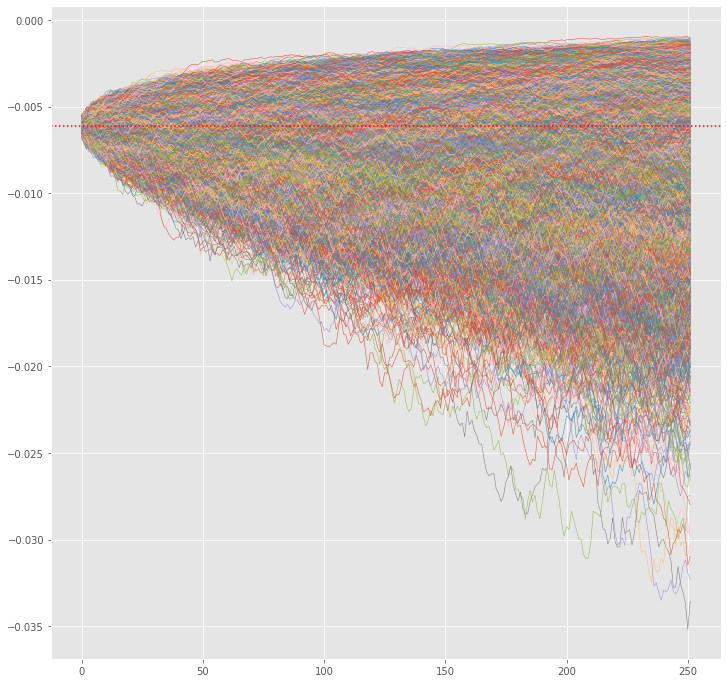

In [10]:
fig = plt.figure(figsize = (12,12))
plt.plot(simulation_df, linewidth=0.5)
plt.axhline(last_price, color='r', linestyle=':')
plt.savefig('lineplot.png')
plt.show()

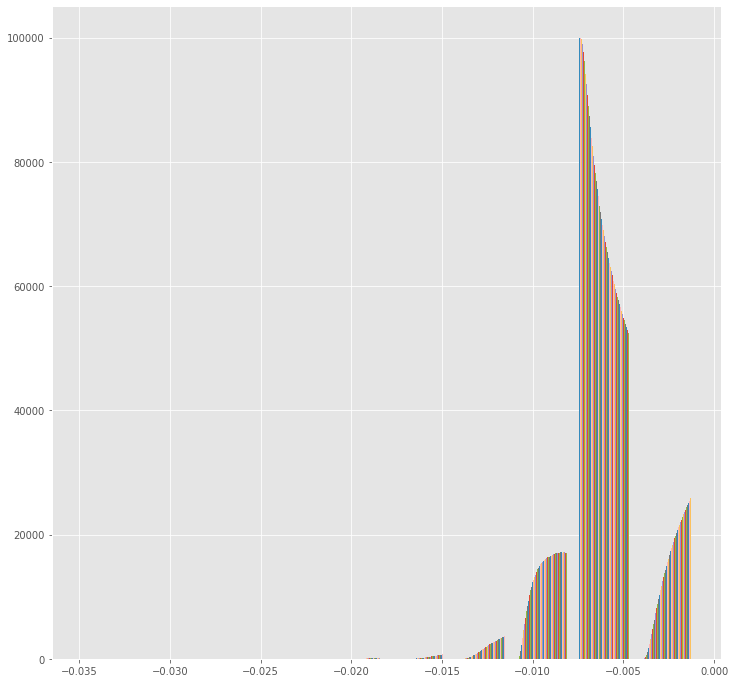

In [11]:
fig = plt.figure(figsize=(12,12))
plt.hist(simulation_df)
plt.savefig('hist.png')
plt.show()